In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('train.csv')
df_corr = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Stage 1
<br>Eksplorasi berbagai attributes
<br>Target output olahan data
<br>Mengecek apakah ada data
<br>bermasalah.
<br>Handling missing value
<br>Handling duplicated data
<br>Handling outlier data
<br>Handling imbalanced data
<br>Handling data redundan
<br>Handling data bermasalah lainnya
<br>Penjelasan proses handling untuk
<br>setiap data yang bermasalah

## Eksplorasi Data

In [ ]:
df.shape

(381109, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Target Output Data

Data clean pada akhir pre-procesing

## Mengecek apakah ada data

Null cek

In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Duplicate cek

In [ ]:
df.duplicated().sum()

0

Imbalanced cek

In [ ]:
df['Driving_License'] = df['Driving_License'].astype('object')
df['Region_Code'] = df['Region_Code'].astype('object')
df['Previously_Insured'] = df['Previously_Insured'].astype('object')
df['Response'] = df['Response'].astype('int')

In [ ]:
num = ['id', 'Age', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']
cat = ['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Response']

In [ ]:
df[cat].describe()

,Response
count,381109.000000
mean,0.122563
std,0.327936
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<AxesSubplot:xlabel='Response', ylabel='count'>

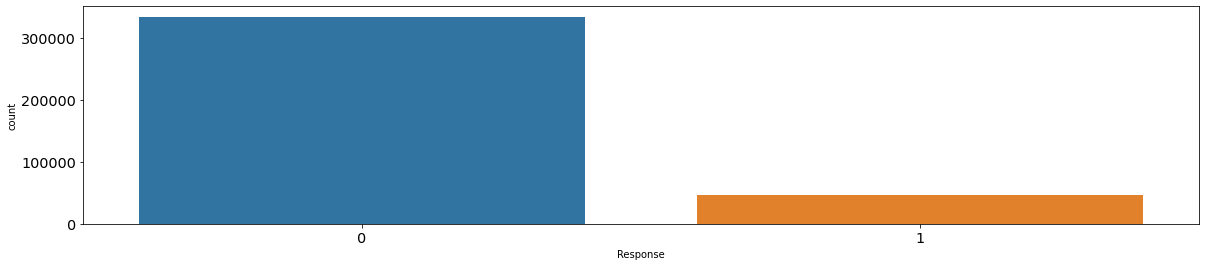

In [ ]:
sns.countplot(df['Response'])

Outliers

In [ ]:
from scipy import stats

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in ['Annual_Premium']:
    zscore = abs(stats.zscore(df[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df = df[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 381109
Jumlah baris setelah memfilter outlier: 379026


In [ ]:
X = df[[col for col in df.columns if (str(df[col].dtype) != 'object') and col not in ['Response']]]
y = df['Response'].values
print(X.shape)
print(y.shape)

(379026, 5)
(379026,)


In [ ]:
from imblearn import under_sampling, over_sampling


# Stage 2

<br>Pengecekan deskripsi statistik data
<br>Pengecekan distribusi setiap features terhadap variabel target
<br>Pengecekan korelasi data
<br>Penjelasan langkah-langkah yang digunakan untuk meningkatkan performa model
<br>Insight yang relevan terhadap masalah
<br>Insight untuk menentukan rekomendasi bisnis
<br>Visualisasi dari insight-insight yang
ada


## Pengecekan deskripsi statistik data

In [ ]:
for col in cat:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Gender:
Male      204915
Female    174111
Name: Gender, dtype: int64

Value count kolom Driving_License:
1    378222
0       804
Name: Driving_License, dtype: int64

Value count kolom Region_Code:
28.0    105111
8.0      33518
46.0     19740
41.0     18173
15.0     13272
30.0     12189
29.0     11024
50.0     10228
3.0       9238
11.0      9209
36.0      8782
33.0      7649
47.0      7433
35.0      6924
6.0       6279
45.0      5598
37.0      5489
18.0      5143
48.0      4681
14.0      4674
39.0      4629
10.0      4371
21.0      4265
2.0       4038
13.0      4033
7.0       3254
12.0      3196
9.0       3100
27.0      2822
32.0      2786
43.0      2635
17.0      2593
26.0      2587
25.0      2501
24.0      2414
38.0      2022
0.0       2020
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1829
4.0       1801
34.0      1662
19.0      1534
22.0      1302
40.0      1293
5.0       1277
1.0       1008
44.0       807
42.0       591
52.0       265
51.0 

## Pengecekan distribusi setiap features terhadap variabel target

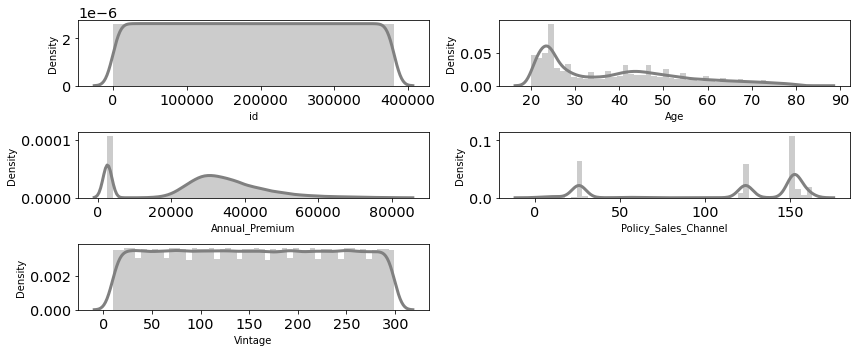

In [ ]:
plt.figure(figsize=(12, 5))
for i in range(0, len(num)):
    plt.subplot(3, len(num)/2, i+1)
    sns.distplot(df[num[i]], color='gray')
    plt.tight_layout()

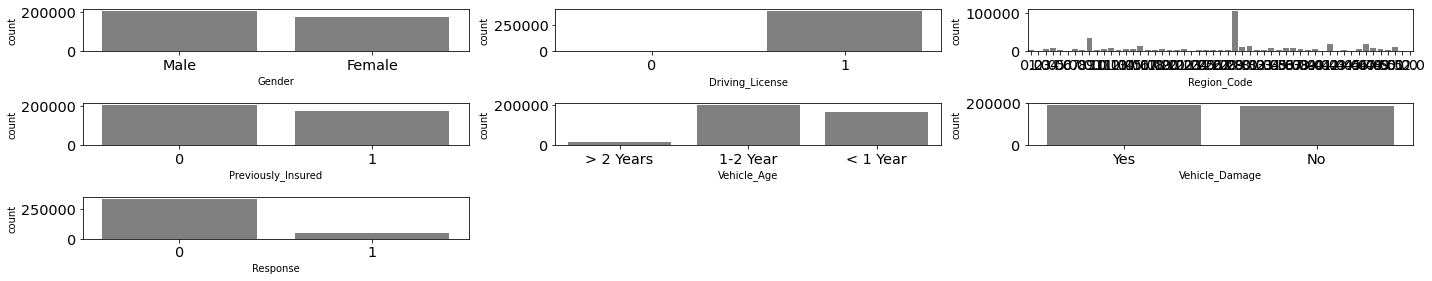

In [ ]:
for i in range(0, len(cat)):
    plt.subplot(3, 3, i+1)
    sns.countplot(df[cat[i]], color='gray', orient='v')
    plt.tight_layout()

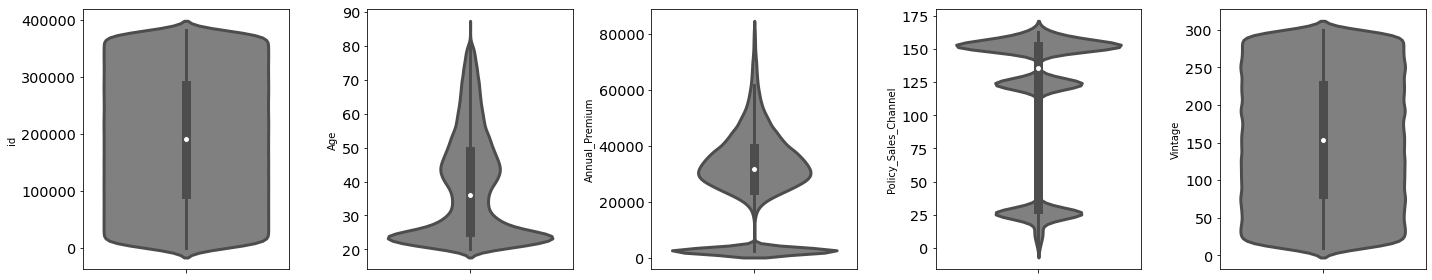

In [ ]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], color='gray', orient='v')
    plt.tight_layout()

## Correlation

In [ ]:
df_corr.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


<AxesSubplot:>

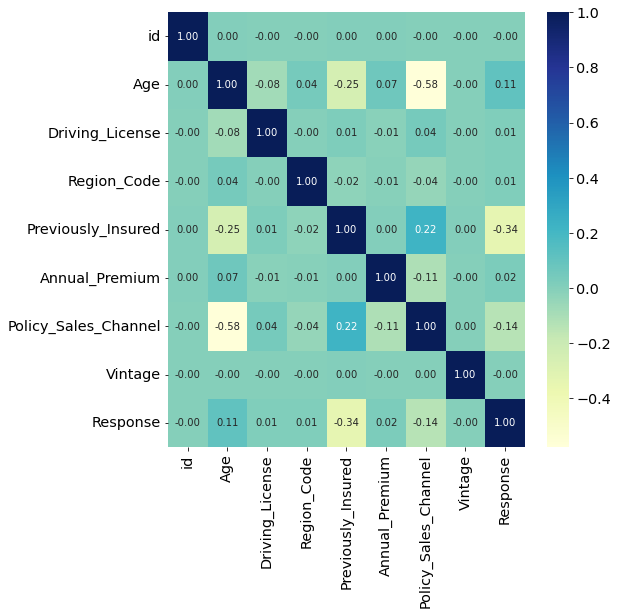

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_corr.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

Dari correlation heatmap di atas dapat dilihat bahwa:

- Target 'response' memiliki korelasi positif lemah dengan driving license, region code, annual premium
- Bahkan tidak ada korelasi dengan kolom vintage 
- Terdapat korelasi negatif yang notable dengan previously insured, di mana jika sebelumnya sudah mengambil vehicle insurance kemungkinan less likely untuk interest mengambil produk asuransi mobil di company ini 
- Terdapat korelasi positif namun tidak cukup kuat antara umur dengan kemungkinan pengambilan insurance

In [ ]:
# plt.figure(figsize=(15, 15))
# sns.pairplot(df_corr, diag_kind='kde')

In [ ]:
# fig = plt.figure(figsize=(15, 15))
# for i in range(0, len(num)):
#     ax = fig.add_subplot(3, 3, i+1)
#     sns.stripplot(ax=ax, data=df, x='Gender', y=num[i])
#     plt.tight_layout()

#     if i != 0: plt.close(i+1)

#     plt.close(len(num) + 1)

In [ ]:
# fig = plt.figure(figsize=(15, 15))
# for i in range(0, len(num)):
#     ax = fig.add_subplot(3, 3, i+1)
#     sns.stripplot(ax=ax, data=df, x='Vehicle_Age', y=num[i])
#     plt.tight_layout()

#     if i != 0: plt.close(i+1)

#     plt.close(len(num) + 1)

## Penjelasan langkah-langkah yang digunakan untuk meningkatkan performa model

1. Meningkatkan Akurasi: Ini adalah ukuran jumlah prediksi benar yang dibuat oleh model. Ini adalah rasio prediksi yang benar dengan prediksi total sehingga nantinya dapat memberi hasil yang lebih baik.

2. Confusion matrix: Ini adalah representasi tabel dari nilai prediksi dan nilai aktual dari dataset. Matriks yang dibuat dimaksudkan untuk memberikan pemahaman yang lebih baik dan visualisasi yang jelas dari hasil model untuk menghindari 'kebingungan'.

3. Presisi dan Perolehan:

- Presisi: Ini memberi kita informasi tentang seberapa benar model mendeteksi hasil positif. Ini adalah rasio dari positif benar ke - total positif.

- Kurva Precision and Recall (PR): Kurva ini adalah korelasi antara presisi dan recall pada nilai cut-off tertentu. .

4. Skor F: Ini adalah ukuran rata-rata harmonik presisi dan perolehan. Skor F adalah hasil dari pengintegrasian parameter ini menjadi satu untuk pemahaman yang lebih baik tentang keakuratan model. F-score dapat dimodifikasi menjadi F, 0,5, 1, & 2 berdasarkan ukuran bobot yang diberikan untuk presisi atas recall. Berikut rumusnya.

5. Kerugian Logaritmik: Pengukuran ini melacak setiap pelabelan yang salah dari kelas data oleh model dan menghukum model jika penyimpangan dalam probabilitas terjadi saat mengklasifikasikan label. Nilai kerugian log yang rendah merupakan nilai akurasi yang tinggi.

6. Kekhususan: Ini adalah ukuran poin negatif yang diprediksi sehubungan dengan semua poin negatif aktual (termasuk positif palsu). Ini mirip dengan penarikan kembali tetapi untuk prediksi negatif, ini sebenarnya mengkomunikasikan offset dalam memprediksi nilai negatif dengan benar oleh model.
 
7. Kurva KOP & AUC: Ini adalah kurva karakteristik operasi penerima yang diplot antara True Positive Rate (TPR) dan False Positive Rate (FPR). Ini adalah kurva probabilitas yang membantu dalam memvisualisasikan model klasifikasi biner dengan menghasilkan informasi tentang seberapa baik model dapat membedakan antara kelas-kelas misalnya apakah pasien menderita Penyakit A atau tidak, dll. AUC adalah area di bawah kurva ini, semakin tinggi area tersebut semakin baik kemampuan model untuk klasifikasi.

## Insight yang relevan terhadap masalah

#### 1. Perbandingan antara kendaraan belum diasuransikan dan mengalami kerusakan 

In [ ]:
df_notins=df[['id','Previously_Insured', 'Vehicle_Damage','Response']]
df_notins=df_notins.groupby(['Previously_Insured','Vehicle_Damage','Response']).count().reset_index()
df_notins=df_notins[df_notins['Vehicle_Damage']=='Yes']
df_notins['total_vehicle']=df_notins.groupby(['Previously_Insured'])['id'].transform('sum')
df_notins=df_notins[df_notins['Previously_Insured']==0]
df_notins['percentage']=df_notins['id']/df_notins['total_vehicle']*100
df_notins

,Previously_Insured,Vehicle_Damage,Response,id,total_vehicle,percentage
2,0,Yes,0,136101,181425,75.017776
3,0,Yes,1,45324,181425,24.982224


<AxesSubplot:ylabel='percentage'>

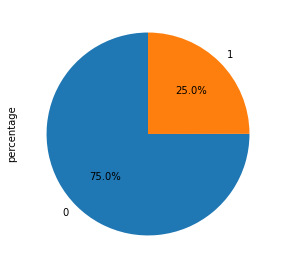

In [ ]:
plt.figure(figsize=(10,5))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
df_notins.plot(kind='pie', y = 'percentage', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=df_notins['Response'], legend = False, fontsize=10)

Dapat dilihat hasil dari persentase bahwa masih ada 74% customer yang tidak tertarik terhadap penawaran yang diberikan meskipun mengalami kerusakan pada kendaraannya dan belum memiliki asuransi 

#### 2. Rasio usia pemilik kendaraan yang belum memiliki asuransi kendaraan

In [ ]:
df_age=df[['id','Previously_Insured', 'Age']]
df_age=df_age[df_age['Previously_Insured']==0]
df_age['Age_cat']=np.where(df_age['Age']> 50, 'Senior Adult',np.where(df_age['Age']> 30, 'Adult', 'Junior Adult' ))
df_age=df_age.groupby(['Age_cat','Previously_Insured']).count().reset_index()
df_age['total_cust']=df_age.groupby(['Previously_Insured'])['id'].transform('sum')
df_age['percentage']=df_age['id']/df_age['total_cust']*100
df_age

,Age_cat,Previously_Insured,id,Age,total_cust,percentage
0,Adult,0,91049,91049,205321,44.344709
1,Junior Adult,0,55671,55671,205321,27.114129
2,Senior Adult,0,58601,58601,205321,28.541162


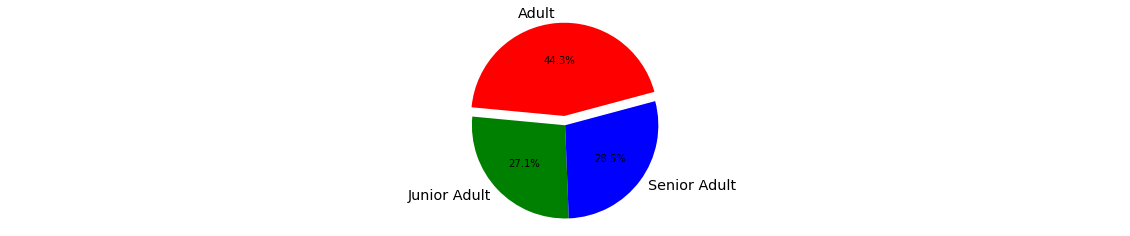

In [ ]:
my_colors = ['red','green','Blue']
my_explode = (0.1, 0, 0)
plt.pie(df_age['percentage'], labels=df_age['Age_cat'], autopct='%1.1f%%', startangle=15, shadow = False, colors=my_colors, explode=my_explode)
plt.title('')
plt.axis('equal')
plt.show()

Pemilik kendaraan dengan rentang usia 30-50 tahun merupakan jumlah customer terbesar yang belum memiliki asuransi kendaraan dibanding dengan usia Junior maupun Senior Adult.

#### 3. Jumlah kendaraan yang belum diasuransikan dan respon ketertarikan 

In [ ]:
df_resp=df[['id','Previously_Insured','Response']]
df_resp=df_resp[df_resp['Previously_Insured']==0]
df_resp=df_resp.groupby(['Response','Previously_Insured']).count().reset_index()
df_resp['total_Resp']=df_resp.groupby(['Previously_Insured'])['id'].transform('sum')
df_resp['percentage']=df_resp['id']/df_resp['total_Resp']*100
df_resp

,Response,Previously_Insured,id,total_Resp,percentage
0,0,0,159091,205321,77.484037
1,1,0,46230,205321,22.515963


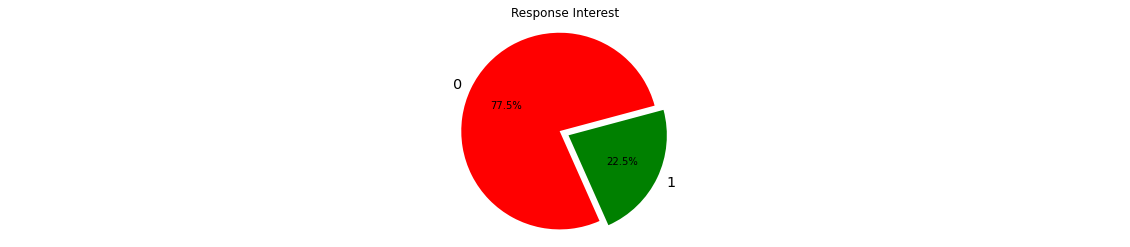

In [ ]:
my_colors = ['red','green']
my_explode = (0.1, 0)
plt.pie(df_resp['percentage'], labels=df_resp['Response'], autopct='%1.1f%%', startangle=15, shadow = False, colors=my_colors, explode=my_explode)
plt.title('Response Interest')
plt.axis('equal')
plt.show()

Jumlah ketertarikan pemilik kendaraan yang belum memiliki asuransi terhadap kendaraannya terbilang kecil hanya dapat menjangkau 22% customer. 

#### mengetahui jumlah respon berdasarkan gender.
- 1 : Customer is interested, 0 : Customer is not interested

Conclusion :
- Customer yang tertarik (response = 1) di dominasi oleh pria
- Customer yang tidak tertarik (response = 0) juga di dominasi oleh pria
- Hal ini dikarenakan jumlah responden pria lebih banyak dibandingkan wanita (jika dilihat count berdasarkan gender)

# Stage 3

<br>Model apa yang ingin dibuat dan digunakan untuk apa
<br>Penjelasan langkah-langkah dalam modelling
<br>Perbandingan hasil dari berbagai algoritma model yang dicoba
<br>Evaluation metrics yang digunakan
<br>Hyperparameter tuning
<br>Model akhir yang dipilih
<br>Penjelasan mengapa model yang dipilih sudah bagus

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379026 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    379026 non-null  int64  
 1   Gender                379026 non-null  object 
 2   Age                   379026 non-null  int64  
 3   Driving_License       379026 non-null  object 
 4   Region_Code           379026 non-null  object 
 5   Previously_Insured    379026 non-null  object 
 6   Vehicle_Age           379026 non-null  object 
 7   Vehicle_Damage        379026 non-null  object 
 8   Annual_Premium        379026 non-null  float64
 9   Policy_Sales_Channel  379026 non-null  float64
 10  Vintage               379026 non-null  int64  
 11  Response              379026 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(6)
memory usage: 44.2+ MB


In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df['Gender'] = df['Gender'].map( {'Female': 0, 'Male': 1} ).astype(int)
df['Vehicle_Damage'] = df['Vehicle_Damage'].map( {'No': 0, 'Yes': 1} ).astype(int)

In [ ]:
cats_label = ['Vehicle_Age']

In [ ]:
df_new = df.copy()

In [ ]:
for cat in cats_label:
    onehots = pd.get_dummies(df_new[cat], prefix=cat)
    df_new = df_new.join(onehots)

In [ ]:
df_new.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1-2 Year,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1,0,0,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0,1,0,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1,0,0,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0,0,1,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0,0,1,0


In [ ]:
df_new = df_new.drop(['Vehicle_Age'], axis= 1)
df_new = df_new.drop(['id'], axis= 1)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379026 entries, 0 to 381108
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Gender                 379026 non-null  int32  
 1   Age                    379026 non-null  int64  
 2   Driving_License        379026 non-null  object 
 3   Region_Code            379026 non-null  object 
 4   Previously_Insured     379026 non-null  object 
 5   Vehicle_Damage         379026 non-null  int32  
 6   Annual_Premium         379026 non-null  float64
 7   Policy_Sales_Channel   379026 non-null  float64
 8   Vintage                379026 non-null  int64  
 9   Response               379026 non-null  int32  
 10  Vehicle_Age_1-2 Year   379026 non-null  uint8  
 11  Vehicle_Age_< 1 Year   379026 non-null  uint8  
 12  Vehicle_Age_> 2 Years  379026 non-null  uint8  
dtypes: float64(2), int32(3), int64(2), object(3), uint8(3)
memory usage: 36.6+ MB


In [ ]:
df_new['Previously_Insured']=df_new['Previously_Insured'].astype('int')
df_new['Driving_License']=df_new['Driving_License'].astype('int')
df_new['Region_Code']=df_new['Region_Code'].astype('int')

In [ ]:
num_scaler = ['Age','Vintage']
cat_scaler = ['Gender','Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Vehicle_Age_1-2 Year', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Region_Code']

In [ ]:
df_new = df_new.rename(columns = {'Vehicle_Age_1-2 Year' : 'Vehicle_Age_1_2_Year', 'Vehicle_Age_< 1 Year' : 'Vehicle_Age_Less_1_Year', 'Vehicle_Age_> 2 Years' : 'Vehicle_Age_More_2_Year'})

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ss= StandardScaler()
df_new[num_scaler] = ss.fit_transform(df_new[num_scaler])

mm = MinMaxScaler()
df_new[['Annual_Premium']] = mm.fit_transform(df_new[['Annual_Premium']])

In [ ]:
# for column in cat_scaler:
#     df_new[column] = df_new[column].astype('int')

In [ ]:
x = df_new.drop(columns=['Response']) # menggunakan semua feature kecuali target
y = df_new['Response']

In [ ]:
x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Age_1_2_Year,Vehicle_Age_Less_1_Year,Vehicle_Age_More_2_Year
0,1,0.335598,1,28,0,1,0.475343,26.0,0.748761,0,0,1
1,1,2.400284,1,3,0,0,0.388403,26.0,0.342402,1,0,0
2,1,0.529162,1,28,0,1,0.448198,26.0,-1.522069,0,0,1
3,1,-1.148396,1,11,1,0,0.326610,152.0,0.581437,0,1,0
4,0,-0.632224,1,41,1,0,0.312497,152.0,-1.378648,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,1,2.271241,1,26,1,0,0.346102,26.0,-0.793013,1,0,0
381105,1,-0.567703,1,37,1,0,0.469839,152.0,-0.279088,0,1,0
381106,1,-1.148396,1,30,1,0,0.408284,160.0,0.079464,0,1,0
381107,0,1.884112,1,14,0,1,0.527660,124.0,-0.960337,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=1/3, random_state=42) #Splitting the data into Train and Test

In [ ]:
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE(1)
xtrain_SMOTE, ytrain_SMOTE = SMOTE.fit_resample(xtrain, ytrain)

In [ ]:
ytrain_SMOTE.shape

(443454,)

In [ ]:
xtrain_SMOTE.shape

(443454, 12)

In [ ]:
df_new.sample(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_1_2_Year,Vehicle_Age_Less_1_Year,Vehicle_Age_More_2_Year
333873,0,-0.503181,1,16,0,1,0.000000,157.0,1.155120,1,1,0,0
52735,0,2.271241,1,28,1,1,0.484203,124.0,0.294595,0,1,0,0
193373,1,0.142033,1,28,0,1,0.396672,26.0,-0.649592,0,1,0,0
140006,0,0.012990,1,41,1,0,0.000000,155.0,-1.127662,0,1,0,0
153354,0,-1.148396,1,7,0,1,0.822651,160.0,-1.677441,0,0,1,0


## Model apa yang ingin dibuat dan digunakan untuk apa

1. Logistic Regresion
2. Desicion Tree
3. Random Forest
4. XGBoost

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier()
# model.fit(xtrain, ytrain)
# y_pred = model.predict(xtest) # prediksi

In [ ]:
# from sklearn.metrics import classification_report
# print (classification_report(ytest, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain_SMOTE, ytrain_SMOTE, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### 1. Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(xtrain_SMOTE, ytrain_SMOTE)
y_pred = lr.predict(xtest)

In [ ]:
eval_classification(lr, y_pred, xtrain_SMOTE, ytrain_SMOTE, xtest, ytest)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.25
Recall (Test Set): 0.97
F1-Score (Test Set): 0.40
AUC: 0.78


In [ ]:
print('Train score:' + str(lr.score(xtrain, ytrain))) #accuracy
print('Test score:' + str(lr.score(xtest, ytest))) #accuracy

Train score:0.642866188599199
Test score:0.6428582735748999


pertanyaan apakah untuk mengetahui model overfit atau tidak bisa hanya dengan accuracy atau dapat menggunakan model evalusasi lainnya seperti f1 score, dan sebagainya

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, y_pred) 

array([[66304, 44607],
       [  515, 14916]], dtype=int64)

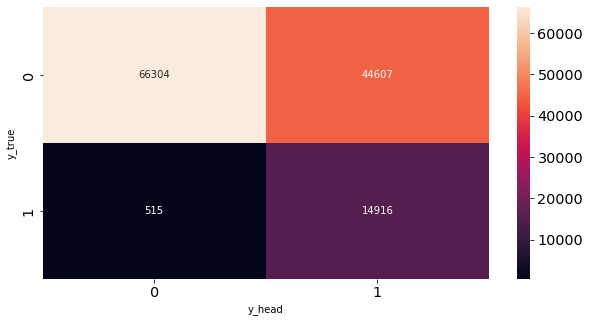

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

### 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(xtrain_SMOTE, ytrain_SMOTE)
y_pred = dt.predict(xtest)

In [ ]:
print('Train score:' + str(dt.score(xtrain, ytrain)))
print('Test score:' + str(dt.score(xtest, ytest)))

Train score:0.9994846190867757
Test score:-0.741729189959017


In [ ]:
fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
print("AUC: %.2f" % auc(fpr, tpr))

AUC: 0.61


### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain_SMOTE, ytrain_SMOTE)

RandomForestClassifier(random_state=42)

In [ ]:
print('Train score:' + str(rf.score(xtrain, ytrain)))
print('Test score:' + str(rf.score(xtest, ytest)))

Train score:0.9998852321476627
Test score:0.8165297367462918


In [ ]:
y_pred = rf.predict(xtest)
eval_classification(rf, y_pred, xtrain_SMOTE, ytrain_SMOTE, xtest, ytest)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.32
Recall (Test Set): 0.46
F1-Score (Test Set): 0.38
AUC: 0.66


In [ ]:
# hyperparameter
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#List Hyperparameters yang akan diuji
hyperparameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

# Init
rfc = RandomForestClassifier(random_state=42)
rfc_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rfc_tuned.fit(xtrain_SMOTE, ytrain_SMOTE)

In [ ]:
# Predict & Evaluation
y_pred = rf_tuned.predict(xtest)#Check performa dari model
eval_classification(rf_tuned, ypred, xtrain, ytrain, xtest, ytest)

NameError: name 'ypred' is not defined

In [ ]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
filename = 'rf_model.sav'

### 4. XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(xtrain_SMOTE, ytrain_SMOTE)

[01:03:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_pred = xg.predict(xtest)
fpr, tpr, thresholds
= roc_curve(ytest, y_pred, pos_label=1)
print("AUC: %.2f" % auc(fpr, tpr))

AUC: 0.68


In [ ]:
print('Train score:' + str(xg.score(xtrain_SMOTE, xtrain_SMOTE)))
print('Test score:' + str(xg.score(xtest, ytest)))
print('================================================')
print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, y_pred))
print("Precision (Test Set): %.2f" % precision_score(ytest, y_pred))
print("Recall (Test Set): %.2f" % recall_score(ytest, y_pred))
print("F1-Score (Test Set): %.2f" % f1_score(ytest, y_pred))
fpr, tpr, thresholds = roc_curve(ytest, y_pred, pos_label=1)
print("AUC: %.2f" % auc(fpr, tpr))

from catboost import CatBoostRegressor

cb = CatBoostRegressor(iterations=2,
                          learning_rate=1,
                          depth=2)
cb.fit(xtrain, ytrain)

y_pred = cb.predict(xtest)
eval_classification(cb, y_pred, xtrain, ytrain, xtest, ytest)

<br>Perbandingan hasil dari berbagai algoritma model yang dicoba


## Penjelasan langkah-langkah dalam modelling

#### 1. Perencanaan Model dan Pengumpulan data

Tujuan pembuatan machine learning adalah untuk mengetahui potensi pembeli yang akan melakukan cross buying untuk asurasi. 

#### 2. Persiapan data

Memisahkan antara traning dan testing dataset bertujuan untuk memberikan data khusus untuk machine learning belajar dan testing dataset digunakan untuk mengevaluasi kemampuan machine learning dari hasil belajar untuk diketahui tingkat error pada machine learning. Penggunaan parameter cv(cross valdation) digunakan untuk memvalidasi model hasil belajar

#### 3. Training Model

Model menggunakan algoritma linear regression, random forest, dan logistic regression. jenis regulasi yang digunakan adalah ridge regression dan lasso regression. regularization digunakan untuk membuat bias dan memperbesar variance pada data training yang harapannya dapat meningkatkan akurasi model pada data testing

#### 4. Evaluasi Model

Evaluasi digunakan untuk menguur performa model yang dihasilkan. Evaluasi data model menggunakan data testing. evaluasi model akan memberikan gambaran kemampuan model jika digunakan dalam studi kasus nyata. evaluasi model yang digunakan adalah RMSE, MAE, dan R2 score.

#### 5. Hyperparameter Tuning

Hyperparameter tuning digunakan utnuk meningkatkan performa model. jenis hyperparameter tuning pada setiap algoritma machine learning akan berbeda pada satu dengan yang lainnya. jenis hyper parameter yang dapat digunakan dalam linear model contohnya adalah nilai alpha dan jenis solver.

#### 6. Prediksi

Model machine learning yang telah baik ditandai memiliki nilai R2 yang mendekati 1 dan tidak ada angka yang terlalu besar atau kecil terhadap pemodelan machine learning train dan test atau tidak terjadi overfiting/underfiting.

## Model akhir yang dipilih

Random Forest + Hyperparameter Tunning